Импорт необходимых библиотек.
1. matplotlib.pyplot - для построения графиков.
2. pandas - для создания dataframe'ов, работы с данными.
3. numpy - аналог Matlab. Для работы с большыми массивами, матрицами.
4. seaborn - также для построения графиков, только современнее matplotlib.pyplot.
5. sklearn - для создания и обучения моделей.

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from sklearn import linear_model
from sklearn import metrics as skl

In [ ]:
a = [1,2,3,4,5,1]
print(a.index(1))

0


Формулы для вычисления среднего значения, дисперсии (меры того, насколько далеко набор чисел разбросан от их среднего значения), коэффициента корреляции (меры того, насколько линейно зависимыми являются две случайные величины).

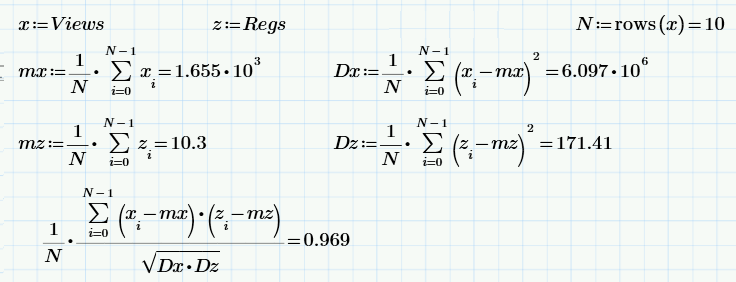

Вывод формул для вычисления коэффицинтов линейной регрессии (y=ax+b).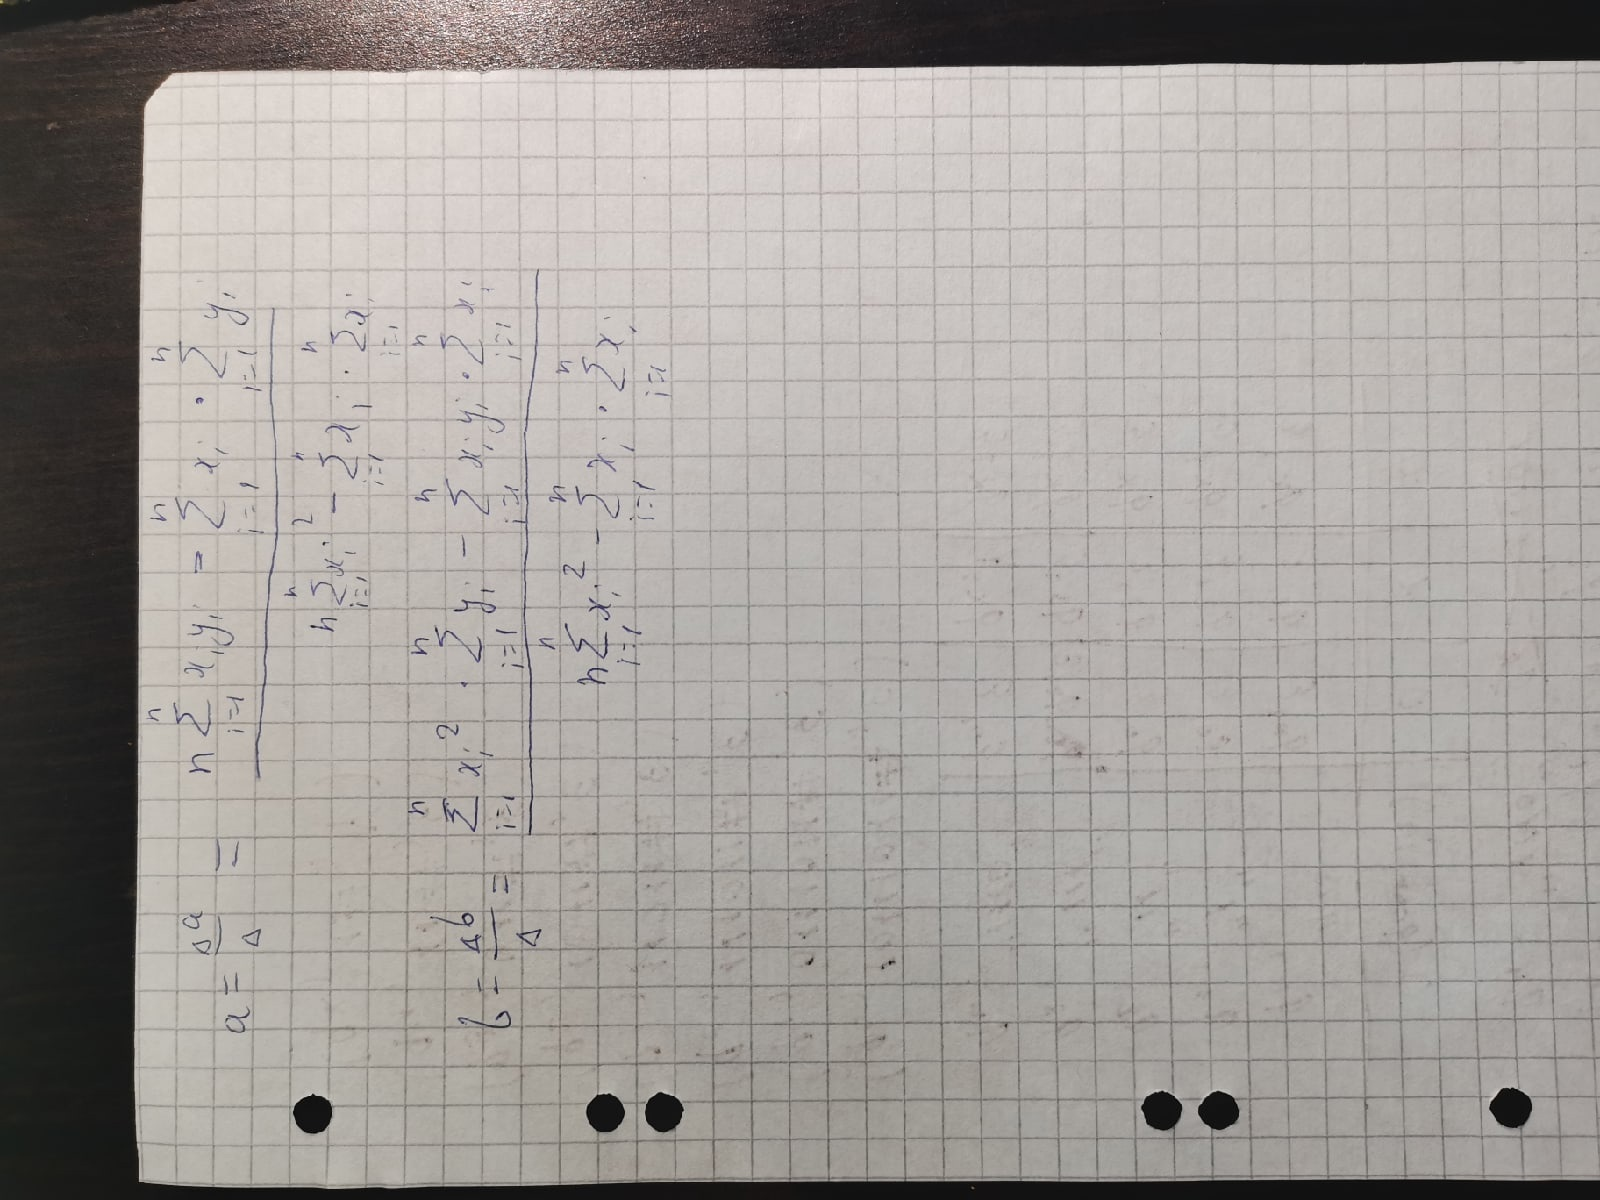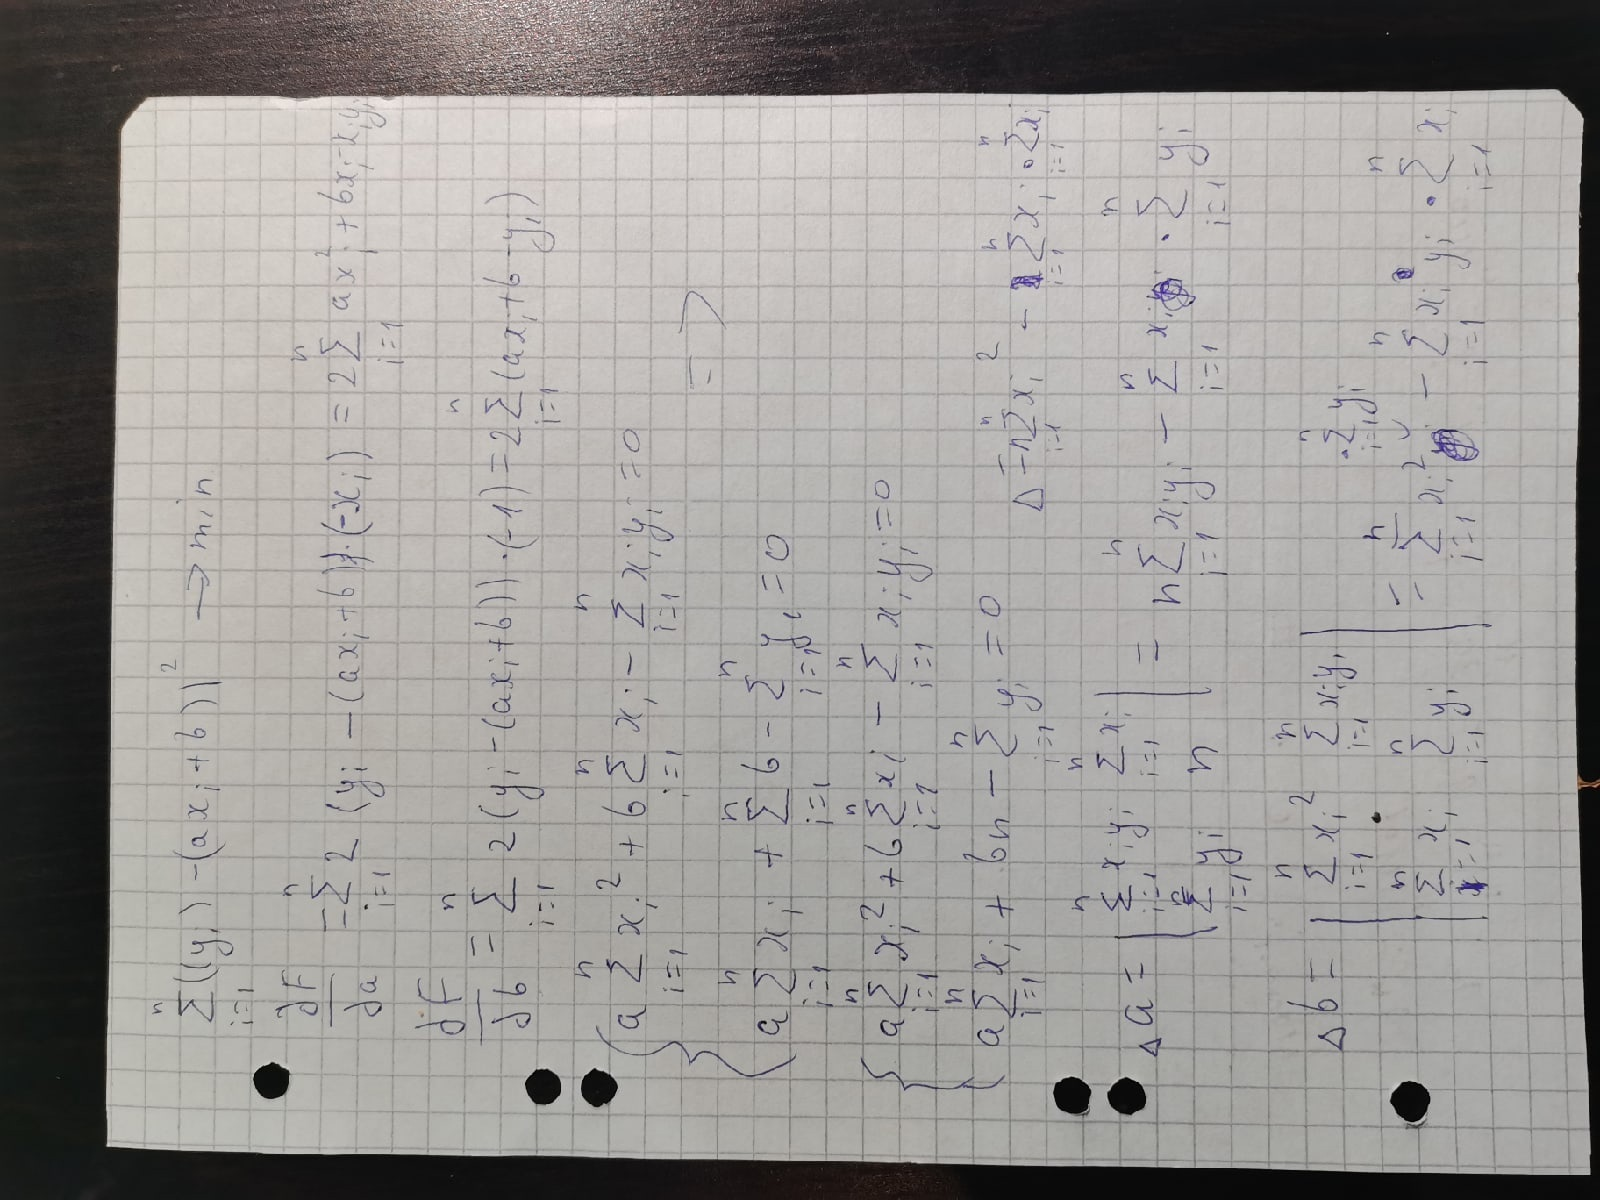

In [ ]:
def get_mean(array):
    return sum([el for el in array])/len(array)

def get_D(array,mean):
    return sum([(el - mean)*(el - mean) for el in array])/len(array)

def get_S(array,mean):
    return math.sqrt(sum([(el - mean)*(el - mean) for el in array])/len(array))

def get_r(array1,array2,m1,m2,D1,D2):
    return sum([(array1[i]-m1)*(array2[i]-m2) for i in range(0,len(array1))])/(10*math.sqrt(D1*D2))

def get_a(m1,m2,array1,array2):
    res1 = res2 = 0
    for i in range(0,len(array1)):
        res1 += array1[i]*array2[i]
        res2 += array1[i]*array1[i]
    return (m1*m2-res1/10)/(m1*m1-res2/10)

def get_b(m1,m2,a):
    return m2 - a*m1

def get_y(x,a,b):
    return a*x+b

def my_predict(x,a,b):
  y = []
  for el in x:
    y.append(el*a+b)
  return y

Построение графиков, отображающих исходные данные. Сравнение результатов самописных функций с функциями библиотеки numpy.

Ежедневная конверсия: [0.00399848 0.00603675 0.00956429 0.0069025  0.00618557 0.02006689
 0.0167364  0.01025641 0.01104972 0.01111111]
Средняя конверсия*100: 0.6223188931182406



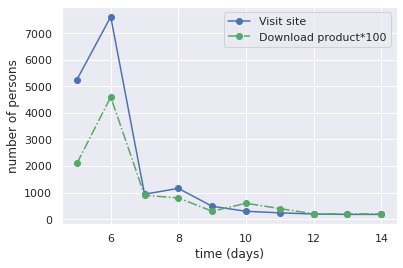

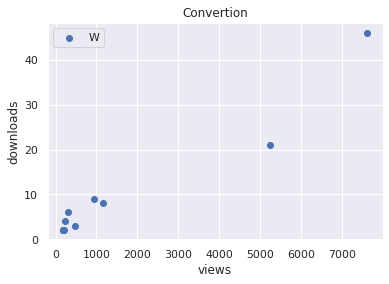

Исходные данные:
   Views  Regs  Dates
0   5252    21      5
1   7620    46      6
2    941     9      7
3   1159     8      8
4    485     3      9
5    299     6     10
6    239     4     11
7    195     2     12
8    181     2     13
9    180     2     14


Показатели исходных данных через numpy:
 Среднее значение - 1655.1,
 Дисперсия - 6096803.89,
 Стандартное отклонение - 2469.1706887131154,
 Минимальное значение - 180,
 Максимальное - 7620,
 Корреляция - 0.9694433977097228

Показатели исходных данных самописными функциями:
 Среднее значение - 1655.1,
 Дисперсия - 6096803.89,
 Стандартное отклонение - 2469.1706887131154,
 Корреляция - 0.9694433977097228.



In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/input_data.csv')
views = np.array(data_df['Views'])
regs = np.array(data_df['Regs'])
dates = np.array(data_df['Dates'])
average_views = get_mean(views)
average_regs = get_mean(regs)
views_disp = get_D(views,average_views)
regs_disp = get_D(regs,average_regs)
standart_deviation_views = get_S(views,average_views) #среднеквадратичное отклонение
standart_deviation_regs = get_S(regs,average_regs)
correlation = get_r(views,regs,average_views,average_regs,views_disp,regs_disp)
a = get_a(average_views,average_regs,views,regs)
b = get_b(average_views,average_regs,a)
a_2 = get_a(average_regs,average_views,regs,views)
b_2 = get_b(average_regs,average_views,a_2)
### Исходные графики
print(f"Ежедневная конверсия: {np.array(regs/views)}")
print(f"Средняя конверсия*100: {100*sum(regs)/sum(views)}\n")
plt.plot(dates,views,'bo-')
plt.plot(dates,100*regs,'go-.')
plt.legend(('Visit site','Download product*100'),loc='upper right')
plt.xlabel('time (days)')
plt.ylabel('number of persons')
plt.show()
### Диаграмма рассеивания
plt.scatter(views,regs)
plt.xlabel('views')
plt.ylabel('downloads')
plt.legend('What is wrong')
plt.title('Convertion')
plt.show()
print("Исходные данные:")
print(data_df)
print("\n")
print(f"Показатели исходных данных через numpy:\n Среднее значение - {np.average(views)},\n Дисперсия - {np.var(views)},\n Стандартное отклонение - {np.std(views)},\n Минимальное значение - {np.min(views)},\n Максимальное - {np.max(views)},\n Корреляция - {np.corrcoef(views,regs)[0][1]}\n")
print(f"Показатели исходных данных самописными функциями:\n Среднее значение - {average_views},\n Дисперсия - {views_disp},\n Стандартное отклонение - {standart_deviation_views},\n Корреляция - {correlation}.\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Диаграмма рассеивания исходных данных, созданная средставми seaborn.

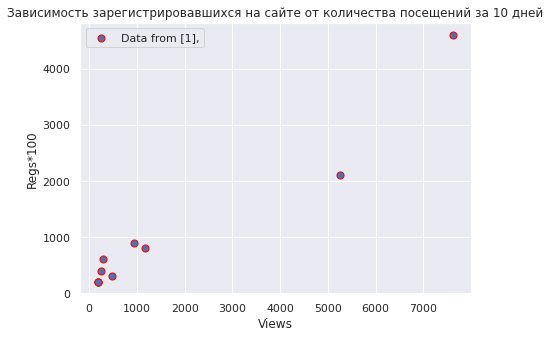

In [ ]:
### seaborn graphic
plt.figure(figsize=(7,5))
plt.scatter(views,regs*100,edgecolor="red",s=50,cmap='coolwarm',label="Data from [1],")
plt.ylabel('Regs*100')
plt.xlabel('Views')
plt.title('Зависимость зарегистрировавшихся на сайте от количества посещений за 10 дней')
plt.legend()
plt.show()

Создание модели линейной регрессии sklearn. Сравнение показателей модели sklearn с самописной моделью. Диаграмма рассеивания с отображением результатов линейной регрессии.

Результаты Sklearn :
 a = [[0.00514031]],
 b = [1.79227075],
 Коэффициент детерминации = 0.9398205013629717

Самописные результаты :
 a = 0.005140311311538676,
 b = 1.7922707482723386,

Sklear: Максимальная остаточная ошибка = 7.789185756473465,
 Средняя квадратическая ошибка = 10.315367861373023,
 Средняя абсолютная ошибка = 2.2618665649749152,
 Медианная абсолютная ошибка = 1.132258291319257,
 Средняя абсолютная процентная ошибка = 0.30109030313845386

Самописная: Максимальная остаточная ошибка = 7.789185756473465,
 Средняя квадратическая ошибка = 10.315367861373023,
 Средняя абсолютная ошибка = 2.2618665649749152,
 Медианная абсолютная ошибка = 1.132258291319257,
 Средняя абсолютная процентная ошибка = 0.30109030313845386



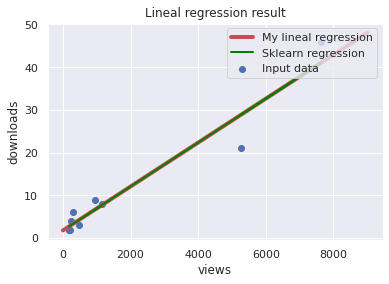

In [ ]:
### sklearn
reg = linear_model.LinearRegression()
view = linear_model.LinearRegression()
x_train = views[:,np.newaxis]
y_train = regs[:,np.newaxis]
reg.fit(x_train,y_train)
view.fit(y_train,x_train)
wsite_y_pred = reg.predict(x_train)
my_y_pred = my_predict(views,a,b)
print(f"Результаты Sklearn :\n a = {reg.coef_},\n b = {reg.intercept_},\n Коэффициент детерминации = {reg.score(x_train,y_train)}\n")
print(f"Самописные результаты :\n a = {a},\n b = {b},\n")
print(f"Sklear: Максимальная остаточная ошибка = {skl.max_error(regs, wsite_y_pred)},\n Средняя квадратическая ошибка = {skl.mean_squared_error(regs, wsite_y_pred)},\n Средняя абсолютная ошибка = {skl.mean_absolute_error(regs, wsite_y_pred)},\n Медианная абсолютная ошибка = {skl.median_absolute_error(regs, wsite_y_pred)},\n Средняя абсолютная процентная ошибка = {skl.mean_absolute_percentage_error(regs, wsite_y_pred)}\n")
print(f"Самописная: Максимальная остаточная ошибка = {skl.max_error(regs, my_y_pred)},\n Средняя квадратическая ошибка = {skl.mean_squared_error(regs, my_y_pred)},\n Средняя абсолютная ошибка = {skl.mean_absolute_error(regs, my_y_pred)},\n Медианная абсолютная ошибка = {skl.median_absolute_error(regs, my_y_pred)},\n Средняя абсолютная процентная ошибка = {skl.mean_absolute_percentage_error(regs, my_y_pred)}\n")
### Диаграмма рассеивания с функцией
plt.scatter(views,regs)
plt.xlabel('views')
plt.ylabel('downloads')
plt.title('Lineal regression result')
plt.plot((0,9000),(get_y(0,a,b),get_y(9000,a,b)),color="r",linewidth=4)
plt.plot(x_train,wsite_y_pred,color="green",linewidth = 2)
plt.legend(('My lineal regression','Sklearn regression','Input data'),loc='upper right')
plt.show()

Создание гистограммы роста президентов. Работа с Dataframe.

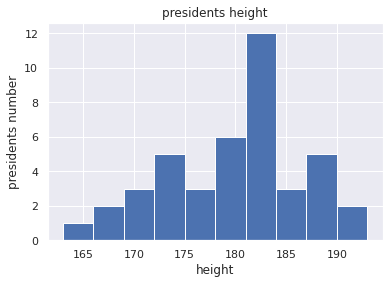

Показатели данных президентов:
 Средний рост - 179.73809523809524,
 Стандартное отклонение - 6.931843442745892,
 Минимальный рост - 163,
 Максимальный рост - 193.

Больше 170: 37

Больше 170, но меньше 190: 35



In [ ]:
### Высота президентов
heights_data = pd.read_csv('/content/drive/MyDrive/president_heights.csv')
heights = np.array(heights_data['height(cm)'])
np.histogram(heights)
plt.xlabel('height')
plt.ylabel('presidents number')
plt.title('presidents height')
plt.hist(heights)
plt.show()
### Presidents sh
print(f"Показатели данных президентов:\n Средний рост - {np.average(heights)},\n Стандартное отклонение - {np.std(heights)},\n Минимальный рост - {np.min(heights)},\n Максимальный рост - {np.max(heights)}.\n")
more170 = np.count_nonzero(heights>170)
print(f"Больше 170: {more170}\n")
print(f"Больше 170, но меньше 190: {np.count_nonzero(np.logical_and(heights>170,heights<190))}")

In [ ]:
#### questions answer
print(f"При количестве посещений сайта в 8000 человек, сколько планируется получить зарегистрировавшихся (или скачавших) программный продукт?\n Самописный ответ - {int(get_y(8000,a,b))},\n Sklearn ответ - {int(reg.predict([[8000]])[0][0])}")
print()
print(f"Для обеспечения 500 скачиваний продукта, сколько человек должны зайти на сайт?\n Самописный ответ - {int(get_y(500,a_2,b_2))},\n Sklearn ответ - {int(view.predict([[500]]))}")

При количестве посещений сайта в 8000 человек, сколько планируется получить зарегистрировавшихся (или скачавших) программный продукт?
 Самописный ответ - 42,
 Sklearn ответ - 42

Для обеспечения 500 скачиваний продукта, сколько человек должны зайти на сайт?
 Самописный ответ - 91188,
 Sklearn ответ - 91188


Вывод:
Между исходными данными имеется зависимость, притом она линейная.


Использованные ресурсы:
1. [mathprofi.ru](http://www.mathprofi.ru/metod_naimenshih_kvadratov.html)
2. https://habr.com/ru/company/nerepetitor/blog/250633/
3. https://scikit-learn.org/stable/index.html
4. https://numpy.org/
5. https://stackoverflow.com/
6. https://matplotlib.org/stable/tutorials/introductory/pyplot.html
